<a href="https://colab.research.google.com/github/jihyeon602/numpy-test/blob/main/practices/practice-numpy_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (실습) 실전 예제: 붓꽃 데이터 분석

In [1]:
# 넘파이
import numpy as np

# 램덤 시드
np.random.seed(12345)

# 어레이 사용되는 부동소수점들의 정확도 지정
np.set_printoptions(precision=4, suppress=True)

In [2]:
# 파이플롯
import matplotlib.pyplot as plt

# # 도표 크기 지정
plt.rc('figure', figsize=(10, 6))

아래 코드는 인터넷 데이터 저장소로부터 아이리스(붓꽃) 데이터(`iris.data`)를
2차원 넘파이 어레이로 불러온다.

- `np.genfromtxt()` 함수의 `dtype='str'` 키워드 옵션: 부동소수점과 문자열이 함께 포함된 데이터이기에 모두 문자열로 통일해서 불러오는 용도

In [3]:
import numpy as np

# 아이리스(붓꽃) 데이터 불러오기
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris = np.genfromtxt(url, delimiter=',', dtype='str')

`iris.data` 파일에는 아래 형식의 데이터가 150개 들어 있다.

```python
5.1,3.5,1.4,0.2,Iris-setosa
```

하나의 데이터에 사용된 값들은 하나의 아이리스(붓꽃)에 대한 꽃잎, 꽃받침과 관련된 특성(features)과 품종을 나타내며,
보다 구체적으로 아래 순서를 따른다.

```
꽃받침 길이, 꽃받침 너비, 꽃잎 길이, 꽃잎 너비, 품종
```

In [4]:
iris.shape

(150, 5)

길이와 너비를 저장하는 특성들은 원래 숫자이지만 위 코드는 문자열로 불러왔다.
처음 5개 데이터를 확인하면 다음과 같다.

__참고:__ `'<U15'`는 길이가 최대 15인 유니코드 문자열 자료형을 나타낸다.

In [ ]:
iris[:5]

array([['5.1', '3.5', '1.4', '0.2', 'Iris-setosa'],
       ['4.9', '3.0', '1.4', '0.2', 'Iris-setosa'],
       ['4.7', '3.2', '1.3', '0.2', 'Iris-setosa'],
       ['4.6', '3.1', '1.5', '0.2', 'Iris-setosa'],
       ['5.0', '3.6', '1.4', '0.2', 'Iris-setosa']], dtype='<U15')

수치형 데이터와 품종 데이터를 분리해서 각각 (150,4), (150,) 모양의 어레이를 생성하자.
이때 수치형 데이터는 `'f8'`, 즉 `'float64'` 자료형을 사용하도록 한다.

In [5]:
iris_features = iris[:,:4].astype('f8')
iris_labels = iris[:, 4]

In [6]:
iris_features[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

150개의 데이터는 아래 세 개의 품종으로 구분되며, 각각 50개씩 아래 언급된 순서대로 구분되어 있다.

```
'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'
```

즉, 0번, 50번, 100번부터 각 품종의 데이터가 시작된다.

In [7]:
iris_labels[::50]

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype='<U15')

In [8]:
iris_labels[:5]

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'], dtype='<U15')

In [9]:
iris_labels[50:55]

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor'], dtype='<U15')

In [10]:
iris_labels[100:105]

array(['Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica'], dtype='<U15')

**문제 1**

꽃잎 길이(2번 열)가 1.5보다 크거나 꽃받침 길이(0번 열)가 5.0보다 작은 데이터만 추출하라.

In [14]:
# None을 적절한 부울 표현식으로 대체하라.

mask = (iris_features[:, 2] > 1.5) | (iris_features[:, 0] < 5.0)
iris_features[mask]

array([[4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.7, 3.8, 1.7, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [4.9, 3.1, 1.5, 0.1],
       [4.4, 3. , 1.3, 0.2],
       [4.5, 2.3, 1.3, 0.3],
       [4.4, 3.2, 1.3, 0.2],
       [5. , 3.5, 1.6, 0.6],
       [5.1, 3.8, 1.9, 0.4],
       [4.8, 3. , 1.4, 0.3],
       [5.1, 3.8, 1.6, 0.2],
       [4.6, 3.2, 1.4, 0.2],
       [7. , 3.2, 4.7, 1.4],
       [6.4, 3.2, 4.5, 1.5],
       [6.9, 3.1, 4.9, 1.5],
       [5.5, 2.3, 4. , 1.3],
       [6.5, 2.8, 4.6, 1.5],
       [5.7, 2

In [15]:
len(iris_features[mask])

129

**문제 2**

꽃받침 길이(0번 열)와 꽃잎 길이(2번 열) 사이의 상관관계를 계산하라.

힌트: 넘파이의 적절한 함수를 활용한다. 상관계수에 대한 설명은 [위키백과: 상관분석](https://ko.wikipedia.org/wiki/상관_분석)을 참고한다.

In [16]:
# 적절한 넘파이 함수를 호출하라.
import numpy as np
correlate = np.corrcoef(iris_features[:, 0], iris_features[:, 2])
correlate

array([[1.    , 0.8718],
       [0.8718, 1.    ]])

**문제 3**

아래 식으로 계산된 값을 갖는 새로운 열(column)이 추가된 2차원 어레이  `iris_features_added`를 생성하라.

$$\frac{\text{원주율} \times \text{꽃잎길이} \times \text{꽃받침길이}^2}{3} $$

힌트: `np.hstack()` 함수를 활용할 수 있다.

In [19]:
# pass와 None을 각각 적절한 코드와 표현식으로 대체하라.

a = (3.14 * iris_features[:, 2] * iris_features[:, 0] ** 2) / 3


iris_features_added = np.hstack((iris_features, a.reshape(-1, 1)))
iris_features_added

array([[  5.1   ,   3.5   ,   1.4   ,   0.2   ,  38.1133],
       [  4.9   ,   3.    ,   1.4   ,   0.2   ,  35.1827],
       [  4.7   ,   3.2   ,   1.3   ,   0.2   ,  30.0571],
       [  4.6   ,   3.1   ,   1.5   ,   0.2   ,  33.2212],
       [  5.    ,   3.6   ,   1.4   ,   0.2   ,  36.6333],
       [  5.4   ,   3.9   ,   1.7   ,   0.4   ,  51.8854],
       [  4.6   ,   3.4   ,   1.4   ,   0.3   ,  31.0065],
       [  5.    ,   3.4   ,   1.5   ,   0.2   ,  39.25  ],
       [  4.4   ,   2.9   ,   1.4   ,   0.2   ,  28.3689],
       [  4.9   ,   3.1   ,   1.5   ,   0.1   ,  37.6957],
       [  5.4   ,   3.7   ,   1.5   ,   0.2   ,  45.7812],
       [  4.8   ,   3.4   ,   1.6   ,   0.2   ,  38.5843],
       [  4.8   ,   3.    ,   1.4   ,   0.1   ,  33.7613],
       [  4.3   ,   3.    ,   1.1   ,   0.1   ,  21.2882],
       [  5.8   ,   4.    ,   1.2   ,   0.2   ,  42.2518],
       [  5.7   ,   4.4   ,   1.5   ,   0.4   ,  51.0093],
       [  5.4   ,   3.9   ,   1.3   ,   0.4   ,  39.677 

In [18]:
# 아래 주석을 해제하고 실행하라.

assert iris_features_added.shape == (150, 5)
iris_features_added[:5]

array([[ 5.1   ,  3.5   ,  1.4   ,  0.2   , 38.1327],
       [ 4.9   ,  3.    ,  1.4   ,  0.2   , 35.2005],
       [ 4.7   ,  3.2   ,  1.3   ,  0.2   , 30.0724],
       [ 4.6   ,  3.1   ,  1.5   ,  0.2   , 33.2381],
       [ 5.    ,  3.6   ,  1.4   ,  0.2   , 36.6519]])

**문제 4**

`Iris_versicolor` 품종에 해당하는 데이터만 `iris_features`로부터 추출하라.

In [21]:
# None을 적절한 부울 표현식으로 대체하라.

mask = iris_labels == 'Iris-versicolor'
iris_features[mask][:5]

array([[7. , 3.2, 4.7, 1.4],
       [6.4, 3.2, 4.5, 1.5],
       [6.9, 3.1, 4.9, 1.5],
       [5.5, 2.3, 4. , 1.3],
       [6.5, 2.8, 4.6, 1.5]])

**문제 5**

꽃받침 길이(0번 열)의 평균값(mean), 중앙값(median), 표준편차(standard deviation)를 구하라.

In [22]:
# None을 적절한 표현식으로 대체하라.

petal_length_mean = np.mean(iris_features[:, 0])
petal_length_median = np.median(iris_features[:, 0])
petal_length_std = np.std(iris_features[:, 0])

print(petal_length_mean, petal_length_median, petal_length_std, sep='\n')

5.843333333333334
5.8
0.8253012917851409


**문제 6**

세 개의 품종 별 꽃받침 너비(1번 열)의 평균값을 계산하여
변수 `iris_kind_sepal_length`가 아래 사전을 가리키도록 하라.

```
{'Iris-setosa':3.418,
 'Iris-versicolor':2.77,
 'Iris-virginica':2.974}
```

In [25]:
labels = np.unique(iris_labels)
labels

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype='<U15')

In [26]:
mask = iris_labels == 'Iris-setosa'
iris_features[:, 1][mask].mean()

3.418

In [27]:
# pass와 None을 각각 적절한 코드와 표현식으로 대체하라.

iris_kind_sepal_length = dict()
for label in labels:
    mask = iris_labels == label
    label_mean = iris_features[:, 1][mask].mean()
    iris_kind_sepal_length[label] = np.round(label_mean, 3)

iris_kind_sepal_length

{'Iris-setosa': 3.418, 'Iris-versicolor': 2.77, 'Iris-virginica': 2.974}

In [28]:
assert (iris_kind_sepal_length == {'Iris-setosa':3.418,
                                   'Iris-versicolor':2.77,
                                   'Iris-virginica':2.974})

**문제 7**

`iris_features`에 사용된 모든 값을 특성별로 정규화(normalization)하라.

힌트: 꽃잎 너비 등 하나의 특성에 속하는 값을 모두 0과 1사이의 값으로 변환하는 작업을 정규화(normalization)라 한다.
정규화에 대한 설명은 [정규화/표준화](https://rucrazia.tistory.com/90)를 참고하라.

In [31]:
# None을 적절한 부울 표현식으로 대체하라.

iris_features_normalized = (iris_features - iris_features.min(axis=0)) / (iris_features.max(axis=0) - iris_features.min(axis=0))
iris_features_normalized

array([[0.2222, 0.625 , 0.0678, 0.0417],
       [0.1667, 0.4167, 0.0678, 0.0417],
       [0.1111, 0.5   , 0.0508, 0.0417],
       [0.0833, 0.4583, 0.0847, 0.0417],
       [0.1944, 0.6667, 0.0678, 0.0417],
       [0.3056, 0.7917, 0.1186, 0.125 ],
       [0.0833, 0.5833, 0.0678, 0.0833],
       [0.1944, 0.5833, 0.0847, 0.0417],
       [0.0278, 0.375 , 0.0678, 0.0417],
       [0.1667, 0.4583, 0.0847, 0.    ],
       [0.3056, 0.7083, 0.0847, 0.0417],
       [0.1389, 0.5833, 0.1017, 0.0417],
       [0.1389, 0.4167, 0.0678, 0.    ],
       [0.    , 0.4167, 0.0169, 0.    ],
       [0.4167, 0.8333, 0.0339, 0.0417],
       [0.3889, 1.    , 0.0847, 0.125 ],
       [0.3056, 0.7917, 0.0508, 0.125 ],
       [0.2222, 0.625 , 0.0678, 0.0833],
       [0.3889, 0.75  , 0.1186, 0.0833],
       [0.2222, 0.75  , 0.0847, 0.0833],
       [0.3056, 0.5833, 0.1186, 0.0417],
       [0.2222, 0.7083, 0.0847, 0.125 ],
       [0.0833, 0.6667, 0.    , 0.0417],
       [0.2222, 0.5417, 0.1186, 0.1667],
       [0.1389, 

아래 코드는 수정하지 마세요!!!

In [32]:
sol = np.array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
                [0.16666667, 0.41666667, 0.06779661, 0.04166667],
                [0.11111111, 0.5       , 0.05084746, 0.04166667],
                [0.08333333, 0.45833333, 0.08474576, 0.04166667],
                [0.19444444, 0.66666667, 0.06779661, 0.04166667]])

assert ~(iris_features_normalized.min(axis=0).all())
assert (iris_features_normalized.max(axis=0).all())
assert np.allclose(iris_features_normalized[:5], sol)

**문제 8**

`iris_features`에 사용된 모든 값을 특성별로 표준화(standardization)하라.

힌트: 꽃잎 너비 등 하나의 특성에 속하는 값들의 평균값은 0, 표준편차는 1이 되도록 항목을 변환하는 작업을 표준화(standardization)라 한다.
표준화에 대한 설명은 [정규화/표준화](https://rucrazia.tistory.com/90)를 참고하라.

In [33]:
# None을 적절한 부울 표현식으로 대체하라.

iris_features_standardized = (iris_features - np.mean(iris_features, axis=0)) / np.std(iris_features, axis=0)
iris_features_standardized

array([[-0.9007,  1.0321, -1.3413, -1.313 ],
       [-1.143 , -0.125 , -1.3413, -1.313 ],
       [-1.3854,  0.3378, -1.3981, -1.313 ],
       [-1.5065,  0.1064, -1.2844, -1.313 ],
       [-1.0218,  1.2635, -1.3413, -1.313 ],
       [-0.5372,  1.9577, -1.1707, -1.05  ],
       [-1.5065,  0.8007, -1.3413, -1.1815],
       [-1.0218,  0.8007, -1.2844, -1.313 ],
       [-1.7489, -0.3564, -1.3413, -1.313 ],
       [-1.143 ,  0.1064, -1.2844, -1.4444],
       [-0.5372,  1.4949, -1.2844, -1.313 ],
       [-1.2642,  0.8007, -1.2275, -1.313 ],
       [-1.2642, -0.125 , -1.3413, -1.4444],
       [-1.87  , -0.125 , -1.5119, -1.4444],
       [-0.0525,  2.1891, -1.455 , -1.313 ],
       [-0.1737,  3.1147, -1.2844, -1.05  ],
       [-0.5372,  1.9577, -1.3981, -1.05  ],
       [-0.9007,  1.0321, -1.3413, -1.1815],
       [-0.1737,  1.7263, -1.1707, -1.1815],
       [-0.9007,  1.7263, -1.2844, -1.1815],
       [-0.5372,  0.8007, -1.1707, -1.313 ],
       [-0.9007,  1.4949, -1.2844, -1.05  ],
       [-1

In [34]:
# 아래 주석을 해제하고 실행하라.
iris_features_standardized[:5]

array([[-0.9007,  1.0321, -1.3413, -1.313 ],
       [-1.143 , -0.125 , -1.3413, -1.313 ],
       [-1.3854,  0.3378, -1.3981, -1.313 ],
       [-1.5065,  0.1064, -1.2844, -1.313 ],
       [-1.0218,  1.2635, -1.3413, -1.313 ]])

**문제 9**

아래 코드는 붓꽃 데이터의 산점도를 품종에 따라 다른 모양과 색을 갖는 산점도를 그린다.

In [35]:
import matplotlib.pyplot as plt
X = iris_features[:, 2] # 꽃잎 길이
Y = iris_features[:, 3] # 꽃잎 너비

points_x = np.arange(0, 7.01, 0.02)
points_y = np.arange(0, 3.51, 0.02)
xs, ys = np.meshgrid(points_x, points_y)

Z = np.zeros(xs.shape)

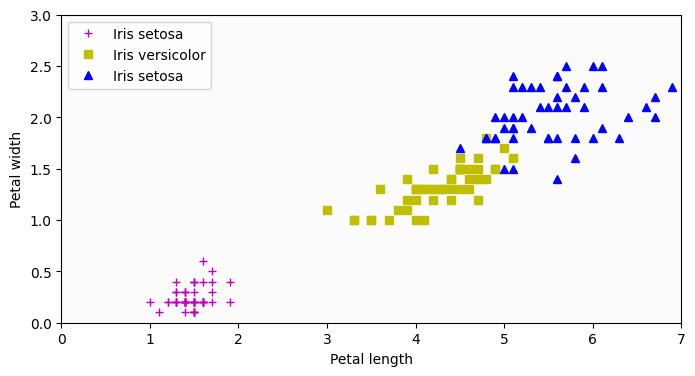

In [36]:
plt.figure(figsize=(8, 4))

# 등고선을 색으로 구분
plt.contourf(xs, ys, Z, alpha=0.1, cmap='Purples')

# 붓꽃 데이터 산점도
plt.plot(X[iris_labels == 'Iris-setosa'], Y[iris_labels == 'Iris-setosa'], 'm+', label='Iris setosa')
plt.plot(X[iris_labels == 'Iris-versicolor'], Y[iris_labels == 'Iris-versicolor'], 'ys', label='Iris versicolor')
plt.plot(X[iris_labels == 'Iris-virginica'], Y[iris_labels == 'Iris-virginica'], 'b^',  label='Iris setosa')

plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.axis([0, 7.0, 0, 3])

# plt.grid()
plt.show()

위 코드에 사용된 2차원 어레이 `Z`를 수정하여 아래 산점도를 그리는 코드를 작성하려 한다.

<p><div align="center"><img src="https://raw.githubusercontent.com/codingalzi/datapy/master/jupyter-book//images/iris-classification.png" style="width:70%;"></div></p>

이를 위해 영역을 구분하는 두 개의 직선은 다음 두 개의 직선 방정식을 이용한다.

```
y = x + 3
y = x + 6.6
```

**질문**

아래 코드는 세 개의 영역을 구분하는 세 개의 마스크를 지정한다.
`None`을 모두 적절한 어레이 논리식으로 대체하라.

In [38]:
mask1 = xs + ys - 3.0 <= 0
mask2 = (xs + ys - 3.0 > 0) & (xs + ys - 6.6 <= 0)
mask3 = (xs + ys - 6.6 > 0)

정해진 마스크에 따라 등고선 어레이 `Z`의 값을 0, 1, 2 중에 하나로 지정한다.

In [39]:
Z[mask1] = 0
Z[mask2] = 1
Z[mask3] = 2

수정된 등고선 어레이 `Z`를 이용하여 산점도를 그린다.

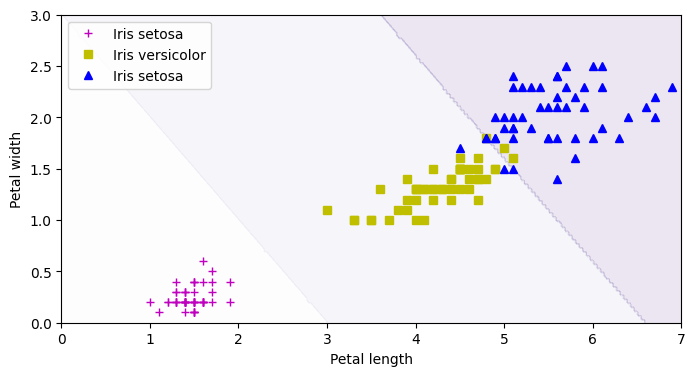

In [40]:
plt.figure(figsize=(8, 4))

# 등고선을 색으로 구분
plt.contourf(xs, ys, Z, alpha=0.1, cmap='Purples')

# 붓꽃 데이터 산점도
plt.plot(X[iris_labels == 'Iris-setosa'], Y[iris_labels == 'Iris-setosa'], 'm+', label='Iris setosa')
plt.plot(X[iris_labels == 'Iris-versicolor'], Y[iris_labels == 'Iris-versicolor'], 'ys', label='Iris versicolor')
plt.plot(X[iris_labels == 'Iris-virginica'], Y[iris_labels == 'Iris-virginica'], 'b^',  label='Iris setosa')

plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.axis([0, 7.0, 0, 3])

# plt.grid()
plt.show()